In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from scipy.fftpack import dct, idct
from sklearn.decomposition import PCA

In [2]:
os.chdir("D:\\binghamton\\datamining\\assignment1")
filename1, filename2, filename3 = "Table1.txt", "Table2.txt", "Table3.txt"
df1 = pd.read_csv(filename1, delimiter=' ', header=None)
df2 = pd.read_csv(filename2, delimiter=' ', header=None)
df3 = pd.read_csv(filename3, delimiter=' ', header=None)


In [3]:
df1 = df1.dropna(axis=1)
df2 = df2.dropna(axis=1)
df3 = df3.dropna(axis=1)

In [4]:
#PCA Algorithm and Analysis

In [5]:
# 1. Generating a mean vector
meanv1 = df1.mean(axis=0)
meanv2 = df2.mean(axis=0)
meanv3 = df3.mean(axis=0)

In [6]:
diff_matrix1 = df1 - meanv1
diff_matrix2 = df2 - meanv2
diff_matrix3 = df3 - meanv3

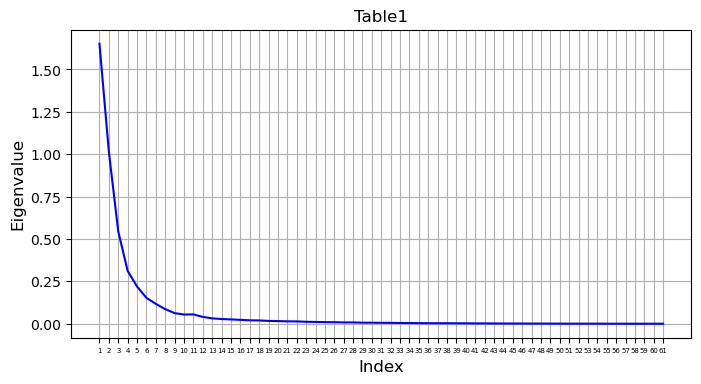

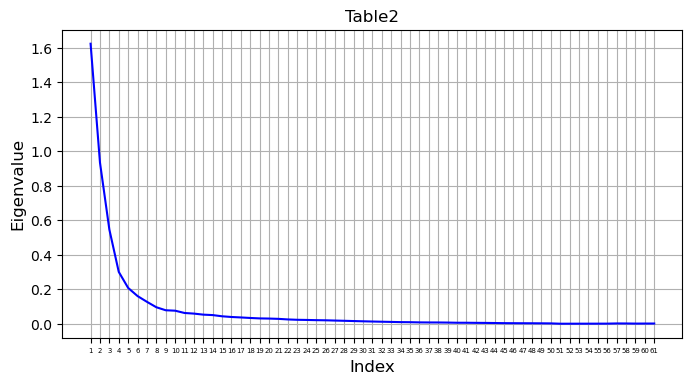

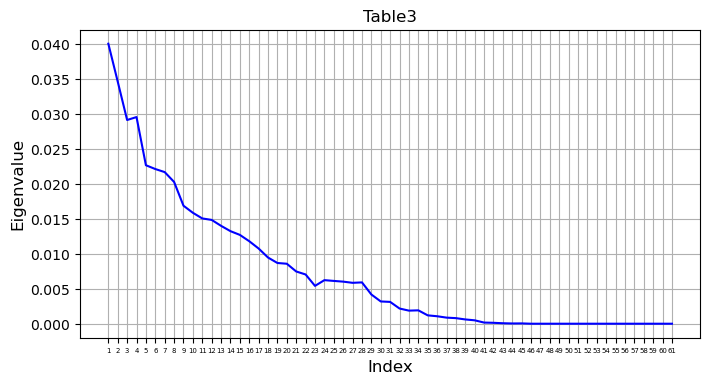

In [7]:

def cal_eig_values(diff_matrix):
    # Compute the covariance matrix C by multiplying the difference matrix D by its transpose D.T
    cov_matrix = diff_matrix.T.dot(diff_matrix)
    # Since each feature was already normalized (each has mean 0), we can divide by N-1 to get the covariance matrix
    cov_matrix /= (len(diff_matrix) - 1)
    cov_matrix = cov_matrix.drop(cov_matrix.index[-1])
    # Drop the last column
    cov_matrix = cov_matrix.drop(cov_matrix.columns[-1], axis=1)
    # covariance_matrix =
    matrix = cov_matrix.to_numpy()
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues

eg1 = cal_eig_values(diff_matrix1)
eg2 = cal_eig_values(diff_matrix2)
eg3 = cal_eig_values(diff_matrix3)

list1 = [eg1, eg2, eg3]

for index , eigenvalues in enumerate(list1):
    # Plot eigenvalues
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, color='blue')
    plt.title(f'Table{index+1}')
    plt.xlabel('Index', fontsize=12)
    plt.ylabel('Eigenvalue', fontsize=12) 
    plt.xticks(np.arange(1, len(eigenvalues) + 1, 1), fontsize=5)  
    plt.yticks(fontsize=10)  
    plt.grid(True)
    plt.show()
    

In [69]:
#PCA components for Table1
pca1 = PCA(n_components = 17)
pca_result1 = pca1.fit_transform(df1)

#PCA components for Table2
pca2 = PCA(n_components = 25)
pca_result2 = pca2.fit_transform(df2)

#PCA components for Table2
pca3 = PCA(n_components = 30)
pca_result3 = pca3.fit_transform(df3)

In [61]:
#Reduced Dimensions of table1
print(f"Dimensions of Table 1 : {pca_result1.shape}")
total_var_explained = np.sum(pca1.explained_variance_ratio_)
print(f"Total percentage of variance explained: {total_var_explained * 100:.2f}%")

Dimensions of Table 1 : (67, 17)
Total percentage of variance explained: 95.64%


In [70]:
#Reduced Dimensions of table2
print(f"Dimensions of Table 2 : {pca_result2.shape}")
total_var_explained = np.sum(pca2.explained_variance_ratio_)
print(f"Total percentage of variance explained: {total_var_explained * 100:.2f}%")

Dimensions of Table 2 : (67, 25)
Total percentage of variance explained: 95.47%


In [71]:
#Reduced Dimensions of table3
print(f"Dimensions of Table 3 : {pca_result3.shape}")
total_var_explained = np.sum(pca3.explained_variance_ratio_)
print(f"Total percentage of variance explained: {total_var_explained * 100:.2f}%")

Dimensions of Table 3 : (67, 30)
Total percentage of variance explained: 96.26%


In [12]:
reconstruction_t1 = pca1.inverse_transform(pca_result1)
reconstruction_t2 = pca2.inverse_transform(pca_result2)
reconstruction_t3 = pca3.inverse_transform(pca_result3)

Text(0.5, 1.0, 'Reconstructed Data Table 1')

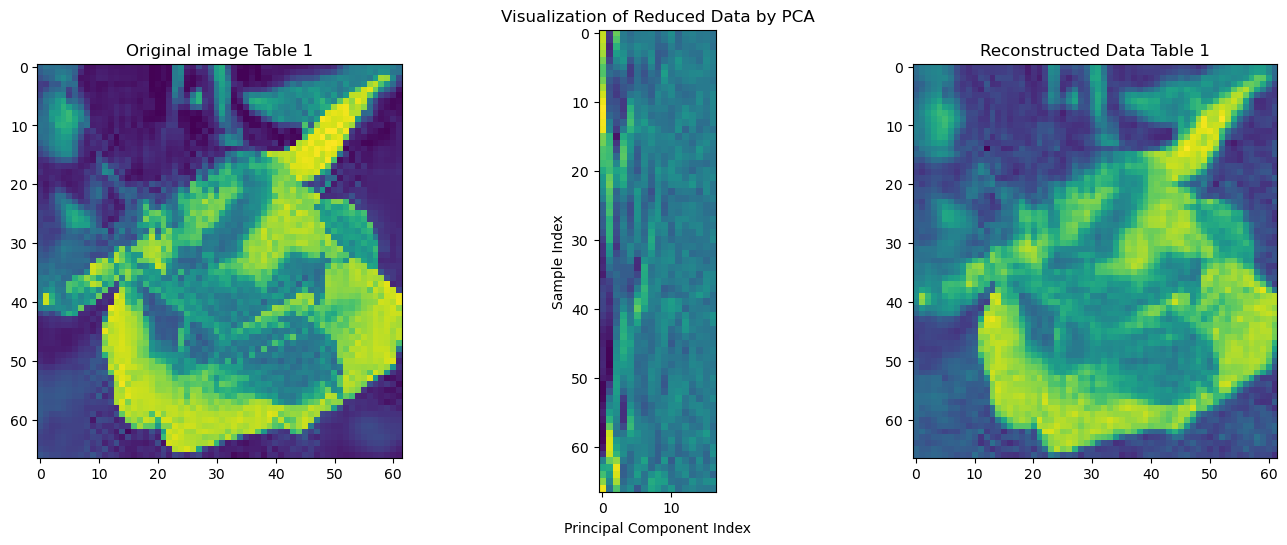

In [13]:
#Plot For Table 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
axes[0].imshow(df1.to_numpy())
axes[0].set_title('Original image Table 1')

axes[1].imshow(pca_result1)
axes[1].set_title('Visualization of Reduced Data by PCA')
axes[1].set_xlabel('Principal Component Index')
axes[1].set_ylabel('Sample Index')

axes[2].imshow(reconstruction_t1)
axes[2].set_title('Reconstructed Data Table 1')

Text(0.5, 1.0, 'Reconstructed Data Table 2')

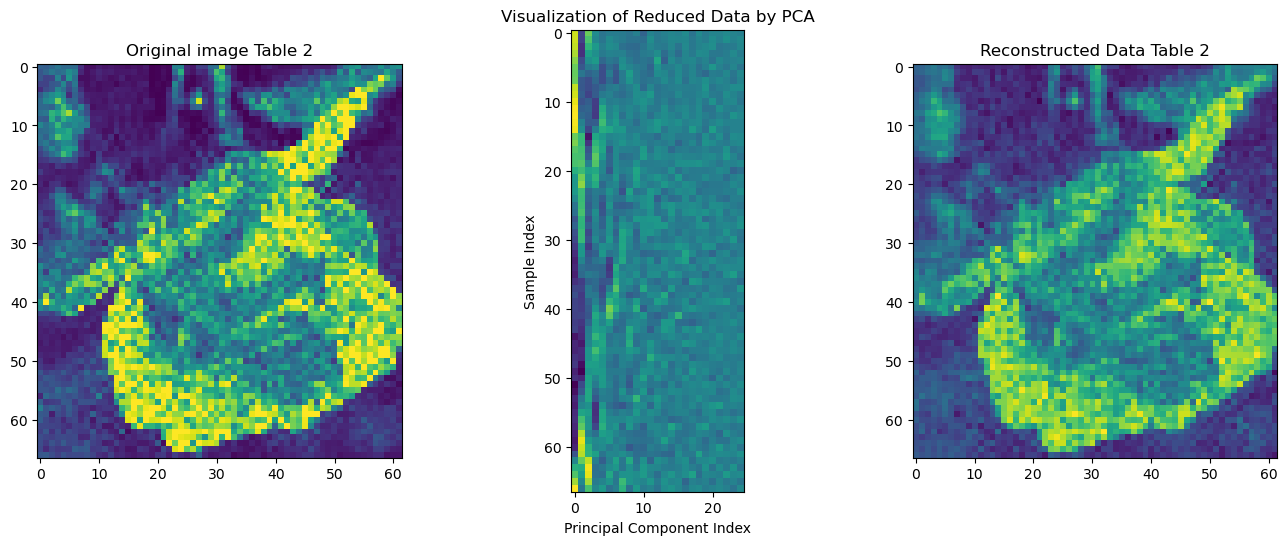

In [14]:
#Plot For Table 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
axes[0].imshow(df2.to_numpy())
axes[0].set_title('Original image Table 2')

axes[1].imshow(pca_result2)
axes[1].set_title('Visualization of Reduced Data by PCA')
axes[1].set_xlabel('Principal Component Index')
axes[1].set_ylabel('Sample Index')

axes[2].imshow(reconstruction_t2)
axes[2].set_title('Reconstructed Data Table 2')

Text(0.5, 1.0, 'Reconstructed Data Table 3')

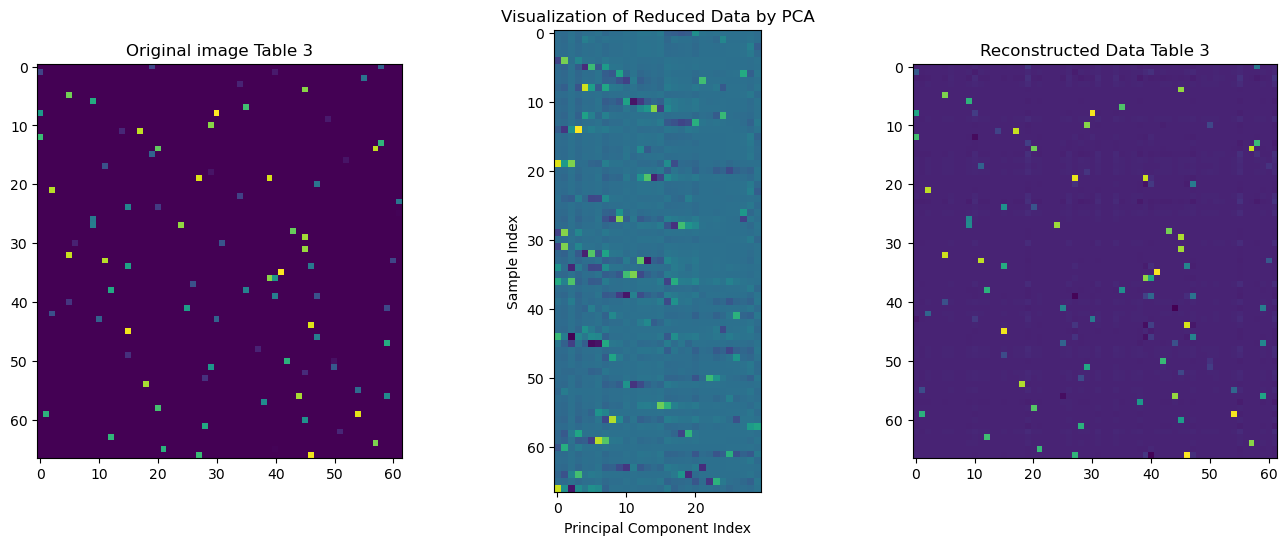

In [15]:
#Plot For Table 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
axes[0].imshow(df3.to_numpy())
axes[0].set_title('Original image Table 3')

axes[1].imshow(pca_result3)
axes[1].set_title('Visualization of Reduced Data by PCA')
axes[1].set_xlabel('Principal Component Index')
axes[1].set_ylabel('Sample Index')

axes[2].imshow(reconstruction_t3)
axes[2].set_title('Reconstructed Data Table 3')

## Discrete Cosine Transform

In [16]:
df1 = pd.read_csv(filename1, delimiter=' ', header=None)
df2 = pd.read_csv(filename2, delimiter=' ', header=None)
df3 = pd.read_csv(filename3, delimiter=' ', header=None)

df1 = df1.dropna(axis=1)
df2 = df2.dropna(axis=1)
df3 = df3.dropna(axis=1)

In [17]:
def scale_and_apply(df):
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df))    
    return np.square(dct(df_scaled, norm="ortho", axis=0))

dct_1 = scale_and_apply(df1)
dct_2 = scale_and_apply(df2)
dct_3 = scale_and_apply(df3)

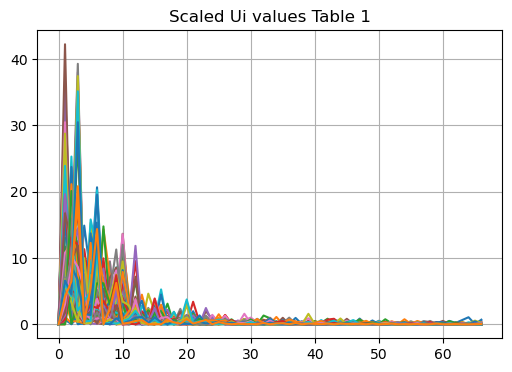

In [18]:
#Table 1
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.plot(dct_1[:, :])
plt.title('Scaled Ui values Table 1')
plt.grid(True)
# plt.legend()
plt.show()

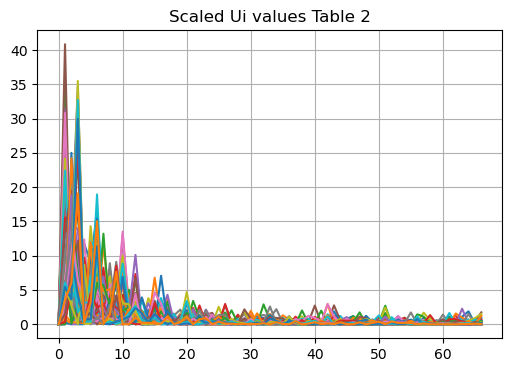

In [19]:
#Table 2
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.plot(dct_2[:, :])
plt.title('Scaled Ui values Table 2')
plt.grid(True)
# plt.legend()
plt.show()

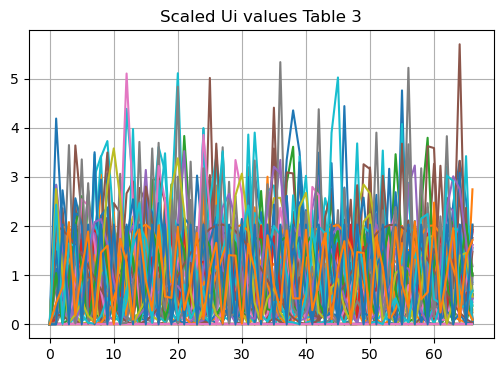

In [20]:
#Table 3
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.plot(dct_3[:, :])
plt.title('Scaled Ui values Table 3')
plt.grid(True)
# plt.legend()
plt.show()

Text(0.5, 1.0, 'Original Img Table 3')

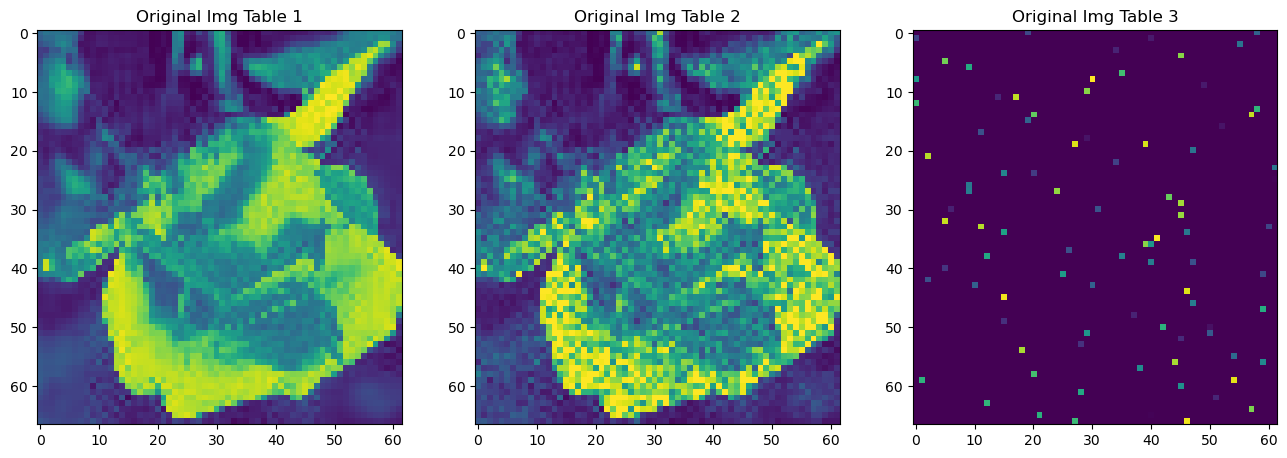

In [21]:
#original Dataset Images:
#Plot For Table 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
axes[0].imshow(df1)
axes[0].set_title('Original Img Table 1')

axes[1].imshow(df2)
axes[1].set_title('Original Img Table 2')

axes[2].imshow(df3)
axes[2].set_title('Original Img Table 3')

In [22]:
def retain_n_components(df):
    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(df))    
    dct_matrix = dct(dct(df, axis=0, norm='ortho'), axis=1, norm='ortho')
    # Select top 20% of coefficients (for example)
    threshold = np.percentile(np.abs(dct_matrix), 90)
    selected_coefficients = np.where(np.abs(dct_matrix) >= threshold, dct_matrix, 0)
#     print(selected_coefficients.shape)
    reconstructed_data = idct(idct(selected_coefficients, axis=0, norm='ortho'), axis=1, norm='ortho')
    return reconstructed_data


def cal_coeffieint_mag(df):
    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(df))    
    dct_matrix = dct(dct(df, axis=0, norm='ortho'), axis=1, norm='ortho')
    magnitude = np.abs(dct_matrix)
    sorted_magnitudes = np.sort(magnitude.flatten())[::-1]
    energy_threshold = 0.9 * np.sum(sorted_magnitudes**2)
    cumulative_energy = 0
    selected_coefficients_count = 0

    for magnitude_value in sorted_magnitudes:
        cumulative_energy += magnitude_value**2
        selected_coefficients_count += 1

        if cumulative_energy >= energy_threshold:
            break
    return selected_coefficients_count
 

Selected Coeffient Count Table 1 = 305
Selected Coeffient Count Table 2 = 778
Selected Coeffient Count Table 3 = 1782


Text(0.5, 1.0, 'Idct Reconstructed Img Table 3')

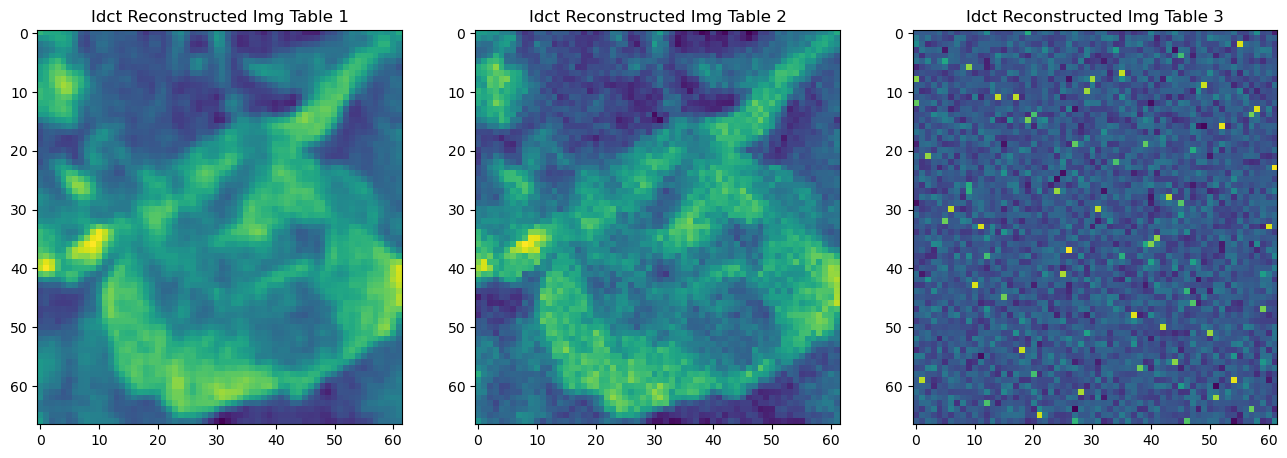

In [51]:
idct1 = retain_n_components(df1)

print(f"Selected Coeffient Count Table 1 = {cal_coeffieint_mag(df1)}") 
idct2 = retain_n_components(df2)
print(f"Selected Coeffient Count Table 2 = {cal_coeffieint_mag(df2)}")
idct3 = retain_n_components(df3)
print(f"Selected Coeffient Count Table 3 = {cal_coeffieint_mag(df3)}")

#Plot For Table 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
axes[0].imshow(idct1)
axes[0].set_title('Idct Reconstructed Img Table 1')

axes[1].imshow(idct2)
axes[1].set_title('Idct Reconstructed Img Table 2')

axes[2].imshow(idct3)
axes[2].set_title('Idct Reconstructed Img Table 3')

In [49]:
print(idct1.shape)
print(idct2.shape)
print(idct3.shape)

(67, 62)
(67, 62)
(67, 62)


# Independent Component Analysis

In [24]:
from sklearn.decomposition import FastICA

df1 = pd.read_csv(filename1, delimiter=' ', header=None)
df2 = pd.read_csv(filename2, delimiter=' ', header=None)
df3 = pd.read_csv(filename3, delimiter=' ', header=None)

df1 = df1.dropna(axis=1)
df2 = df2.dropna(axis=1)
df3 = df3.dropna(axis=1)

In [25]:
# Normalize the data in iCA
df1_normalized = (df1 - df1.mean()) / df1.std()
df2_normalized = (df2 - df2.mean()) / df2.std()
df3_normalized = (df3 - df3.mean()) / df3.std()

In [26]:
# Choosing the components from the dataset
components1 = min(len(df1), len(df1.columns))
components2 = min(len(df2), len(df2.columns))
components3 = min(len(df3), len(df3.columns))

df1_normalized = df1_normalized.dropna(axis=1)
df2_normalized = df2_normalized.dropna(axis=1)
df3_normalized = df3_normalized.dropna(axis=1)

In [27]:
#passing components to the ICA algorithm
def apply_ict(normalize_df, components):
    ica = FastICA(n_components=components, random_state=0)
    S = ica.fit_transform(normalize_df)
    inverse = ica.inverse_transform(S)
    #determine A which is the mixing matrix
    A = ica.mixing_
    # Calculating the importance of each components after summing up the absolute a A values
    return (np.sort(np.sum(np.abs(S),axis=0))[::-1], S, inverse) 
#     sortedv = np.sort(imp)[::-1]

In [28]:
imp_components1, red_data1, reconstructed1 = apply_ict(df1_normalized,df1_normalized.shape[1])
imp_components2, red_data2, reconstructed2 = apply_ict(df2_normalized, df1_normalized.shape[1])
imp_components3 , red_data3, reconstructed3 = apply_ict(df3_normalized, min(df1_normalized.shape[1], 40))

Text(0.5, 1.0, 'Mixing COmponents Table 3')

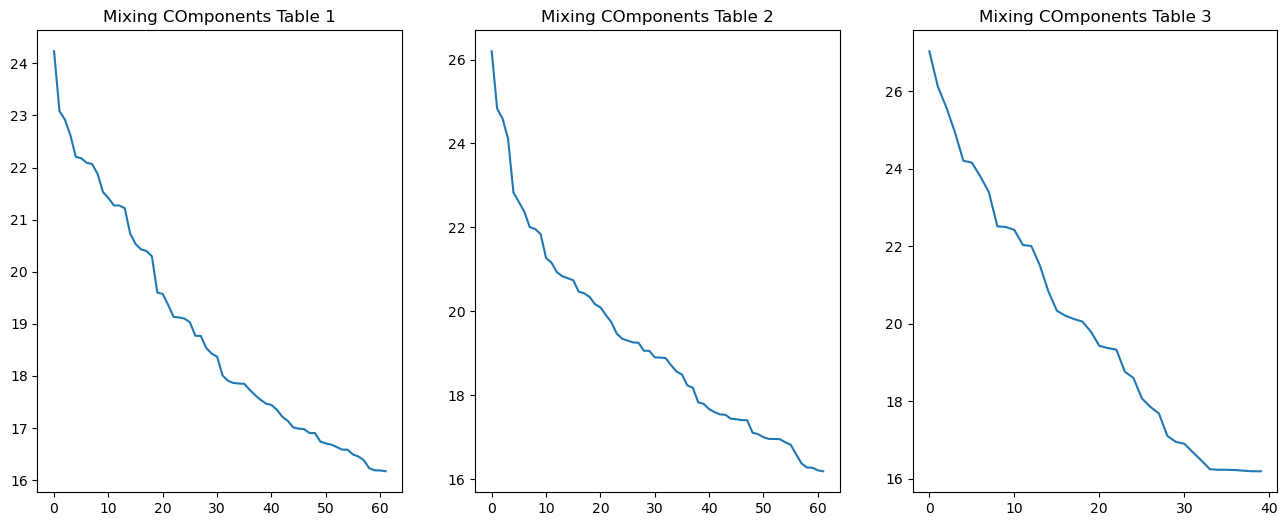

In [29]:
#Plot For Table 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
axes[0].plot(imp_components1)
axes[0].set_title('Mixing COmponents Table 1')

axes[1].plot(imp_components2)
axes[1].set_title('Mixing COmponents Table 2')

axes[2].plot(imp_components3)
axes[2].set_title('Mixing COmponents Table 3')

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Text(0, 0.5, 'Log10 Eigenvalues')

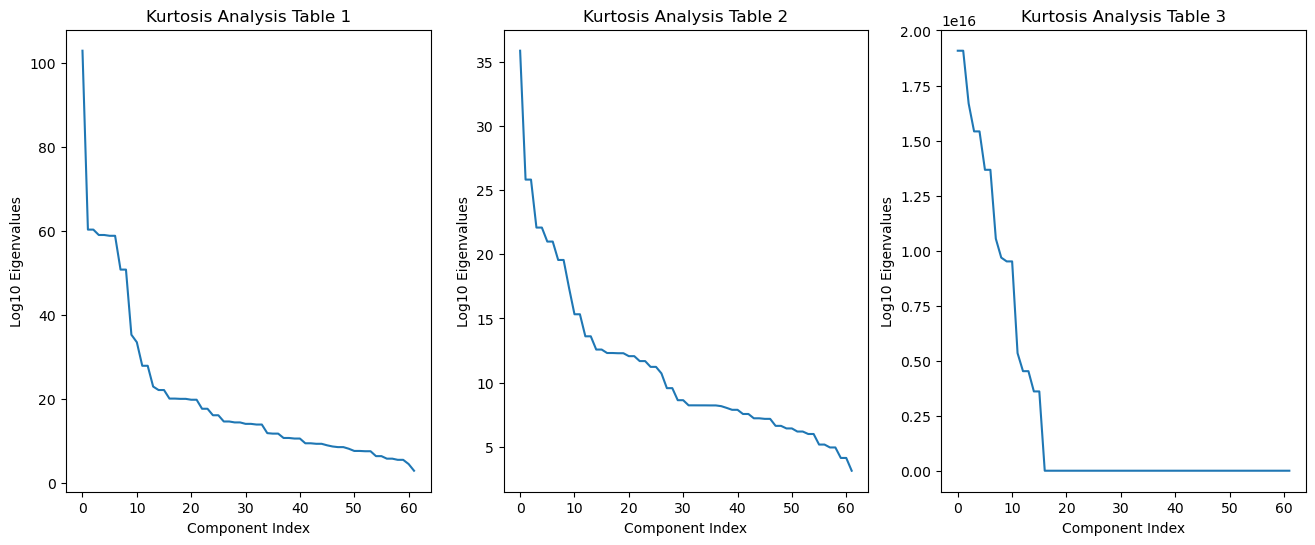

In [33]:
from scipy.stats import kurtosis

def analyse_kurtosis_values(df):
    ica = FastICA()
    transformed = ica.fit_transform(df)
    kurtosis_values = np.apply_along_axis(kurtosis, axis=0, arr=transformed)
    eigenvalues = np.linalg.eigvals(ica.components_)
    num_components_to_select = np.sum(kurtosis_values >= 0.9)
    return np.sort(np.abs(eigenvalues))[::-1]

kurtosisdf1 = analyse_kurtosis_values(df1)
kurtosisdf2 = analyse_kurtosis_values(df2)
kurtosisdf3 = analyse_kurtosis_values(df3)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
axes[0].plot(kurtosisdf1)
axes[0].set_title('Kurtosis Analysis Table 1')
axes[0].set_xlabel('Component Index')
axes[0].set_ylabel('Log10 Eigenvalues')

axes[1].plot(kurtosisdf2)
axes[1].set_title('Kurtosis Analysis Table 2')
axes[1].set_xlabel('Component Index')
axes[1].set_ylabel('Log10 Eigenvalues')

axes[2].plot(kurtosisdf3)
axes[2].set_title('Kurtosis Analysis Table 3')
axes[2].set_xlabel('Component Index')
axes[2].set_ylabel('Log10 Eigenvalues')

Text(0.5, 1.0, 'Reconstructed Data Table 1')

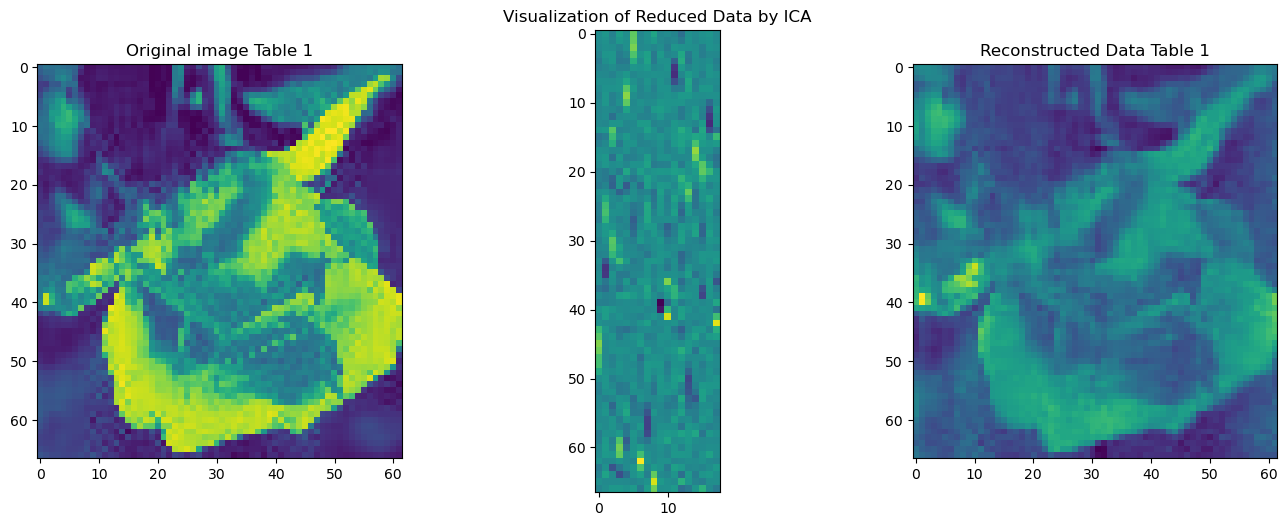

In [52]:
imp_components1, red_data1, reconstructed1 = apply_ict(df1_normalized,18)
imp_components2, red_data2, reconstructed2 = apply_ict(df2_normalized, 25)
imp_components3 , red_data3, reconstructed3 = apply_ict(df3_normalized, 20)

#Plot For Table 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
axes[0].imshow(df1.to_numpy())
axes[0].set_title('Original image Table 1')

axes[1].imshow(red_data1)
axes[1].set_title('Visualization of Reduced Data by ICA')

axes[2].imshow(reconstructed1)
axes[2].set_title('Reconstructed Data Table 1')

Text(0.5, 1.0, 'Reconstructed Data Table 2')

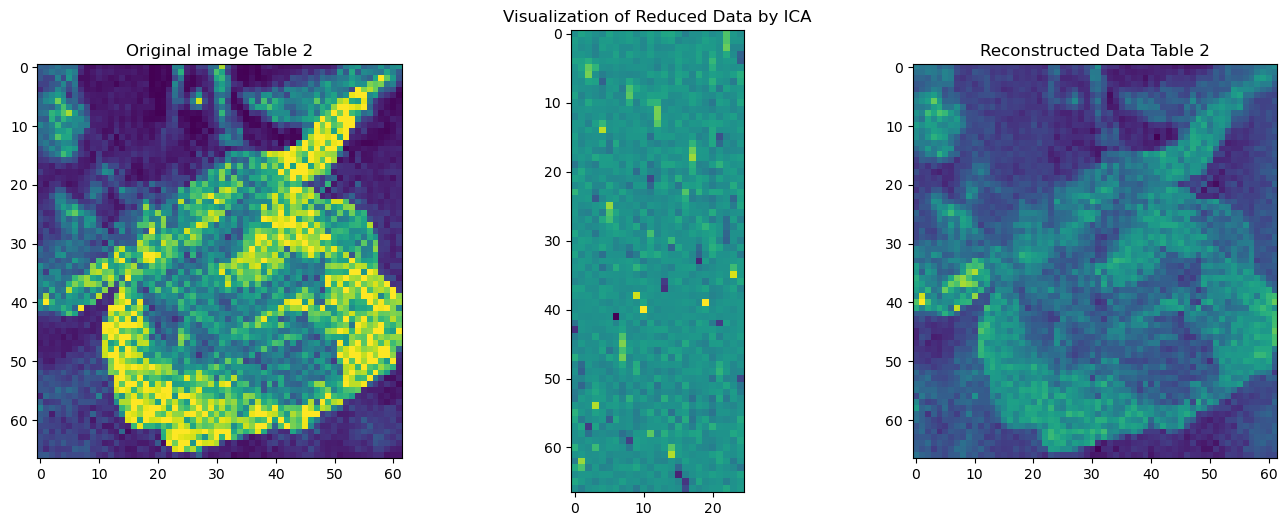

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
axes[0].imshow(df2.to_numpy())
axes[0].set_title('Original image Table 2')

axes[1].imshow(red_data2)
axes[1].set_title('Visualization of Reduced Data by ICA')

axes[2].imshow(reconstructed2)
axes[2].set_title('Reconstructed Data Table 2')

Text(0.5, 1.0, 'Reconstructed Data Table 3')

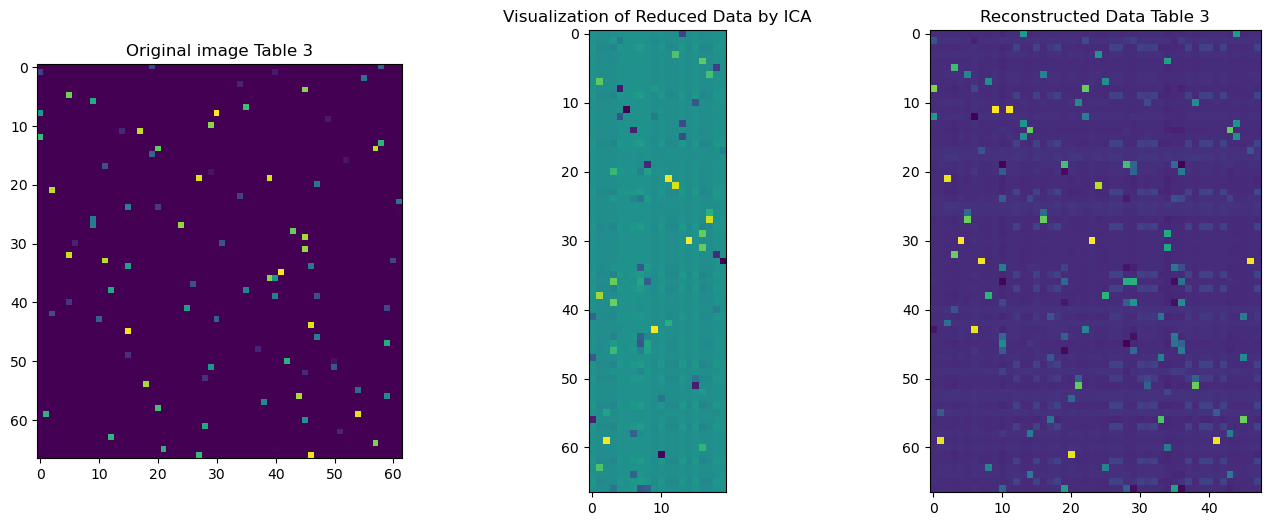

In [54]:
#Plot For Table 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
axes[0].imshow(df3.to_numpy())
axes[0].set_title('Original image Table 3')

axes[1].imshow(red_data3)
axes[1].set_title('Visualization of Reduced Data by ICA')
axes[2].imshow(reconstructed3)
axes[2].set_title('Reconstructed Data Table 3')

In [55]:
#Reconstructed Dimensions
red_data1.shape

(67, 18)

In [56]:
red_data2.shape

(67, 25)

In [57]:
red_data3.shape

(67, 20)